<a href="https://colab.research.google.com/github/shreyasat27/MSc-QT-/blob/main/Cooling_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve

# Constants
gamma = 1.0       # Spontaneous emission rate
eta = 0.1         # Lamb-Dicke parameter
omega = 1.0       # Trap frequency
Omega_values = [0.1, 0.3, 0.5, 0.7, 1.0, 1.5, 2.0, 3.0]  # Rabi frequencies to test
Delta_range = np.linspace(-5, 5, 300)  # Detuning values

def compute_u_y(Delta, Omega, gamma, nu):
    # Steady-state Bloch vector components
    P = gamma**2 + Delta**2 + (Omega**2)/2
    sx = -Delta * Omega / P
    sy = gamma * Omega / P
    sz = -(gamma**2 + Delta**2) / P  # Corrected sz expression

    # Compute RHS of modified Bloch equations
    rhs = np.array([
        -0.5j * sz,          # -Tr[sigma_y * rho_ss * sigma_x] = -0.5i<σ_z>
        -0.5,                # -Tr[sigma_y * rho_ss * sigma_y] = -0.5
        0.5j * sx,           # -Tr[sigma_y * rho_ss * sigma_z] = 0.5i<σ_x>
        -0.5j * sy           # -Tr[sigma_y * rho_ss * Id] = -0.5i<σ_y>
    ], dtype=complex)

    # Coefficient matrix from modified Bloch equations
    A = np.array([
        [-gamma + 1j*nu, Delta, 0, 0],
        [-Delta, -gamma + 1j*nu, -Omega, 0],
        [0, Omega, -2*gamma + 1j*nu, -2*gamma],
        [0, 0, 0, 1j*nu]
    ], dtype=complex)

    # Solve for u_x, u_y, u_z, u_Id
    u = solve(A, rhs)

    return u[1]  # Return u_y (complex valued)

# Compute cooling rate R ∝ S(ν) - S(-ν) for each Omega and detuning
results = {}

for Omega in Omega_values:
    cooling_rates = []
    for Delta in Delta_range:
        # Compute u_y for +ν and -ν
        u_y_pos = compute_u_y(Delta, Omega, gamma, +omega)
        u_y_neg = compute_u_y(Delta, Omega, gamma, -omega)

        # Compute S(ν) and S(-ν)
        S_pos = (eta**2 * Omega**2 / 4) * u_y_pos
        S_neg = (eta**2 * Omega**2 / 4) * u_y_neg

        # Cooling rate is proportional to the difference
        cooling_rate = np.real(S_pos - S_neg)  # Take real part
        cooling_rates.append(cooling_rate)

    results[Omega] = cooling_rates

print(results)

{0.1: [np.float64(3.974021492266511e-07), np.float64(4.0540620973938855e-07), np.float64(4.136251625698474e-07), np.float64(4.220661950913247e-07), np.float64(4.307367809816164e-07), np.float64(4.3964469335411686e-07), np.float64(4.487980185626514e-07), np.float64(4.582051707176201e-07), np.float64(4.6787490695324217e-07), np.float64(4.778163434880127e-07), np.float64(4.880389725229483e-07), np.float64(4.985526800248038e-07), np.float64(5.093677644441904e-07), np.float64(5.204949564214392e-07), np.float64(5.319454395360993e-07), np.float64(5.437308721592213e-07), np.float64(5.558634104709502e-07), np.float64(5.6835573270955e-07), np.float64(5.812210647217475e-07), np.float64(5.944732068882197e-07), np.float64(6.081265625022053e-07), np.float64(6.221961676835383e-07), np.float64(6.36697722914936e-07), np.float64(6.51647626292073e-07), np.float64(6.670630085838882e-07), np.float64(6.829617702046206e-07), np.float64(6.993626202043313e-07), np.float64(7.162851173900482e-07), np.float64(7.3

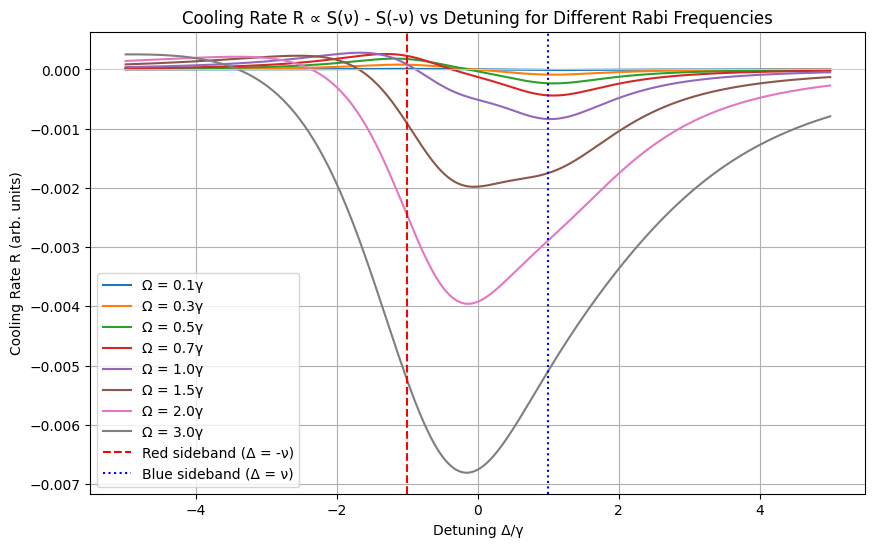

In [6]:
# Plot the results
plt.figure(figsize=(10, 6))
for Omega, rates in results.items():
    plt.plot(Delta_range, rates, label=f'Ω = {Omega}γ')

plt.xlabel('Detuning Δ/γ')
plt.ylabel('Cooling Rate R (arb. units)')
plt.title('Cooling Rate R ∝ S(ν) - S(-ν) vs Detuning for Different Rabi Frequencies')
plt.axvline(x=-omega, color='red', linestyle='--', label='Red sideband (Δ = -ν)')
plt.axvline(x=omega, color='blue', linestyle=':', label='Blue sideband (Δ = ν)')
plt.axhline(y=0, color='yellow', linestyle='-', linewidth=0.5)
plt.legend()
plt.grid(True)
plt.show()

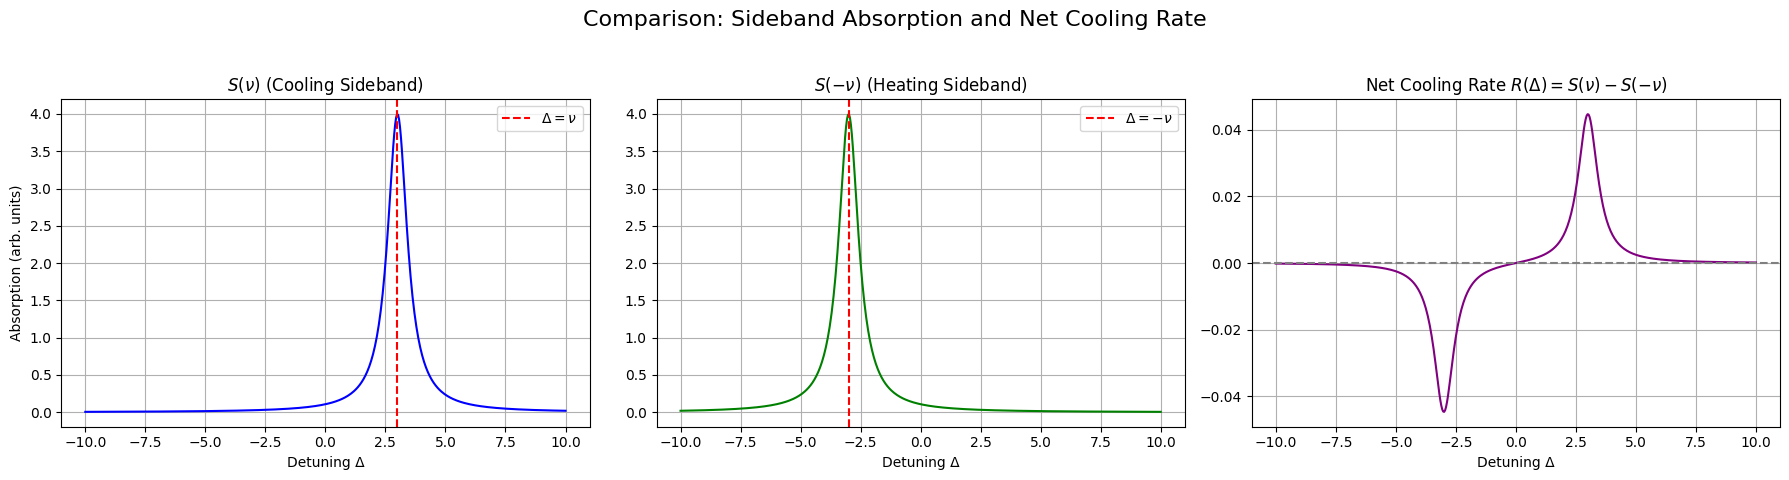

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
eta = 0.1
gamma = 0.5
nu = 3.0
Delta_range = np.linspace(-10, 10, 500)

# Functions
def S_pos(Delta, nu, gamma):
    return 1 / (gamma**2 + (Delta - nu)**2)

def S_neg(Delta, nu, gamma):
    return 1 / (gamma**2 + (Delta + nu)**2)

def R_net(Delta, eta, nu, gamma):
    prefactor = (eta**2 * nu**2 * gamma) / 4
    return prefactor * (S_pos(Delta, nu, gamma) - S_neg(Delta, nu, gamma))

# Compute
S_nu_vals = S_pos(Delta_range, nu, gamma)
S_minus_nu_vals = S_neg(Delta_range, nu, gamma)
R_vals = R_net(Delta_range, eta, nu, gamma)

# Plot all three
fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharex=True)

# S(ν)
axs[0].plot(Delta_range, S_nu_vals, color='blue')
axs[0].set_title(r"$S(\nu)$ (Cooling Sideband)")
axs[0].set_xlabel("Detuning Δ")
axs[0].set_ylabel("Absorption (arb. units)")
axs[0].axvline(nu, color='red', linestyle='--', label=r"$\Delta = \nu$")
axs[0].legend()
axs[0].grid(True)

# S(−ν)
axs[1].plot(Delta_range, S_minus_nu_vals, color='green')
axs[1].set_title(r"$S(-\nu)$ (Heating Sideband)")
axs[1].set_xlabel("Detuning Δ")
axs[1].axvline(-nu, color='red', linestyle='--', label=r"$\Delta = -\nu$")
axs[1].legend()
axs[1].grid(True)

# R(Δ) = S(ν) − S(−ν)
axs[2].plot(Delta_range, R_vals, color='purple')
axs[2].set_title(r"Net Cooling Rate $R(\Delta) = S(\nu) - S(-\nu)$")
axs[2].set_xlabel("Detuning Δ")
axs[2].axhline(0, color='gray', linestyle='--')
axs[2].grid(True)

plt.suptitle("Comparison: Sideband Absorption and Net Cooling Rate", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Different values of $\nu$

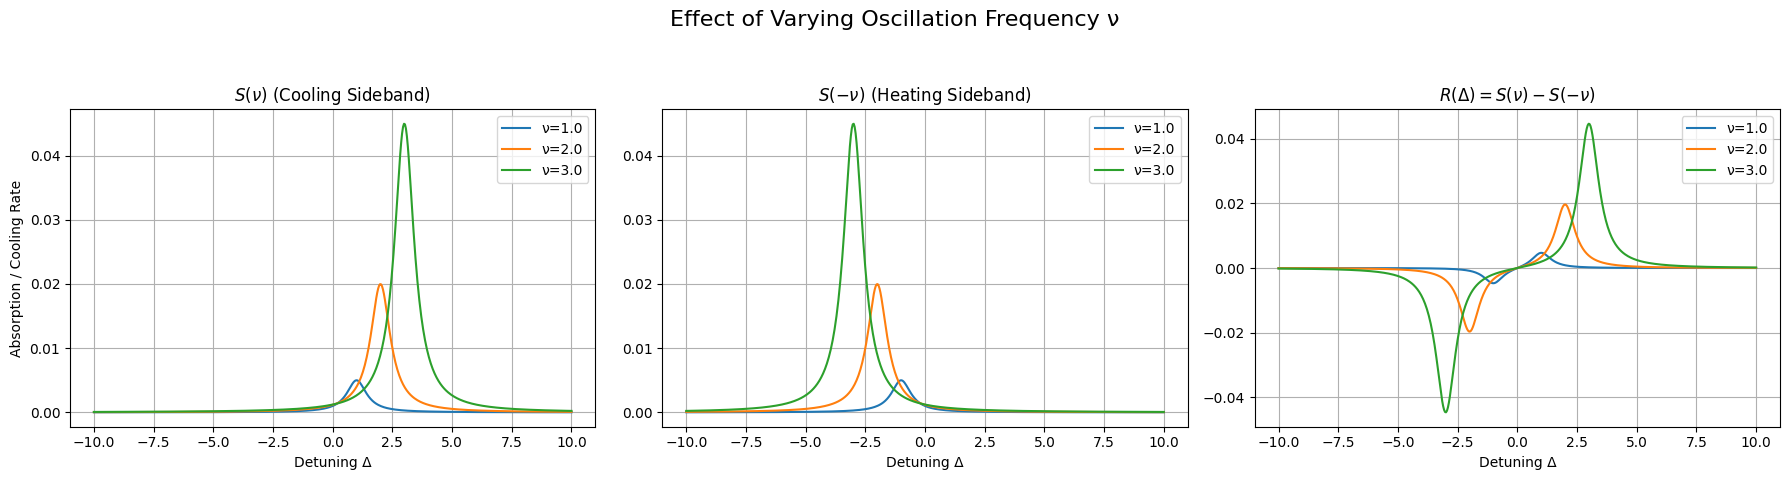

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Detuning range and fixed parameters
Delta_range = np.linspace(-10, 10, 500)
gamma = 0.5
eta = 0.1
nu_values = [1.0, 2.0, 3.0]  # Oscillation frequencies to compare

# Sideband functions
def S_pos(Delta, nu, gamma):
    return 1 / (gamma**2 + (Delta - nu)**2)

def S_neg(Delta, nu, gamma):
    return 1 / (gamma**2 + (Delta + nu)**2)

def R_net(Delta, eta, nu, gamma):
    prefactor = (eta**2 * nu**2 * gamma) / 4
    return prefactor * (S_pos(Delta, nu, gamma) - S_neg(Delta, nu, gamma))

# Shared detuning axis
Delta_range = np.linspace(-10, 10, 500)

# Base functions with full η² dependence
def S_pos(Delta, eta, nu, gamma):
    return (eta**2 * nu**2 * gamma) / (4 * (gamma**2 + (Delta - nu)**2))

def S_neg(Delta, eta, nu, gamma):
    return (eta**2 * nu**2 * gamma) / (4 * (gamma**2 + (Delta + nu)**2))

def R_net(Delta, eta, nu, gamma):
    return S_pos(Delta, eta, nu, gamma) - S_neg(Delta, eta, nu, gamma)

# === Sweep Over ν ===
nu_values = [1.0, 2.0, 3.0]
gamma = 0.5
eta = 0.1

fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharex=True)
for nu in nu_values:
    S_nu_vals = S_pos(Delta_range, eta, nu, gamma)
    S_minus_nu_vals = S_neg(Delta_range, eta, nu, gamma)
    R_vals = R_net(Delta_range, eta, nu, gamma)

    axs[0].plot(Delta_range, S_nu_vals, label=f'ν={nu}')
    axs[1].plot(Delta_range, S_minus_nu_vals, label=f'ν={nu}')
    axs[2].plot(Delta_range, R_vals, label=f'ν={nu}')

axs[0].set_title(r"$S(\nu)$ (Cooling Sideband)")
axs[1].set_title(r"$S(-\nu)$ (Heating Sideband)")
axs[2].set_title(r"$R(\Delta) = S(\nu) - S(-\nu)$")

for ax in axs:
    ax.set_xlabel("Detuning Δ")
    ax.grid(True)
    ax.legend()
axs[0].set_ylabel("Absorption / Cooling Rate")
plt.suptitle("Effect of Varying Oscillation Frequency ν", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.93])
plt.show()

Different values of  $\gamma$

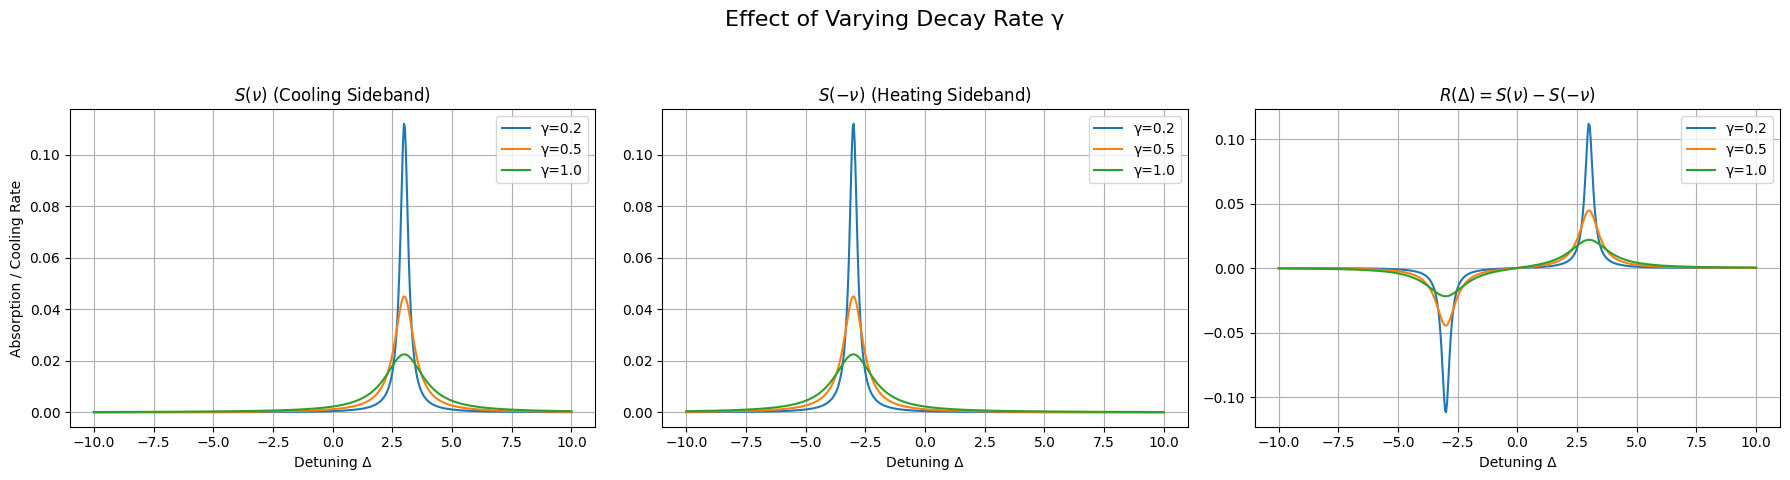

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Detuning range and fixed parameters
Delta_range = np.linspace(-10, 10, 500)
nu = 3.0           # Fixed oscillation frequency
eta = 0.1          # Fixed Lamb-Dicke parameter
gamma_values = [0.2, 0.5, 1.0]  # Different decay rates to compare

# Sideband functions
def S_pos(Delta, nu, gamma):
    return 1 / (gamma**2 + (Delta - nu)**2)

def S_neg(Delta, nu, gamma):
    return 1 / (gamma**2 + (Delta + nu)**2)

def R_net(Delta, eta, nu, gamma):
    prefactor = (eta**2 * nu**2 * gamma) / 4
    return prefactor * (S_pos(Delta, nu, gamma) - S_neg(Delta, nu, gamma))

#detuning axis
Delta_range = np.linspace(-10, 10, 500)

# Base functions with full η² dependence
def S_pos(Delta, eta, nu, gamma):
    return (eta**2 * nu**2 * gamma) / (4 * (gamma**2 + (Delta - nu)**2))

def S_neg(Delta, eta, nu, gamma):
    return (eta**2 * nu**2 * gamma) / (4 * (gamma**2 + (Delta + nu)**2))

def R_net(Delta, eta, nu, gamma):
    return S_pos(Delta, eta, nu, gamma) - S_neg(Delta, eta, nu, gamma)

# === Sweep Over γ ===
nu = 3.0
gamma_values = [0.2, 0.5, 1.0]

fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharex=True)
for gamma in gamma_values:
    S_nu_vals = S_pos(Delta_range, eta, nu, gamma)
    S_minus_nu_vals = S_neg(Delta_range, eta, nu, gamma)
    R_vals = R_net(Delta_range, eta, nu, gamma)

    axs[0].plot(Delta_range, S_nu_vals, label=f'γ={gamma}')
    axs[1].plot(Delta_range, S_minus_nu_vals, label=f'γ={gamma}')
    axs[2].plot(Delta_range, R_vals, label=f'γ={gamma}')

axs[0].set_title(r"$S(\nu)$ (Cooling Sideband)")
axs[1].set_title(r"$S(-\nu)$ (Heating Sideband)")
axs[2].set_title(r"$R(\Delta) = S(\nu) - S(-\nu)$")

for ax in axs:
    ax.set_xlabel("Detuning Δ")
    ax.grid(True)
    ax.legend()
axs[0].set_ylabel("Absorption / Cooling Rate")
plt.suptitle("Effect of Varying Decay Rate γ", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.93])
plt.show()


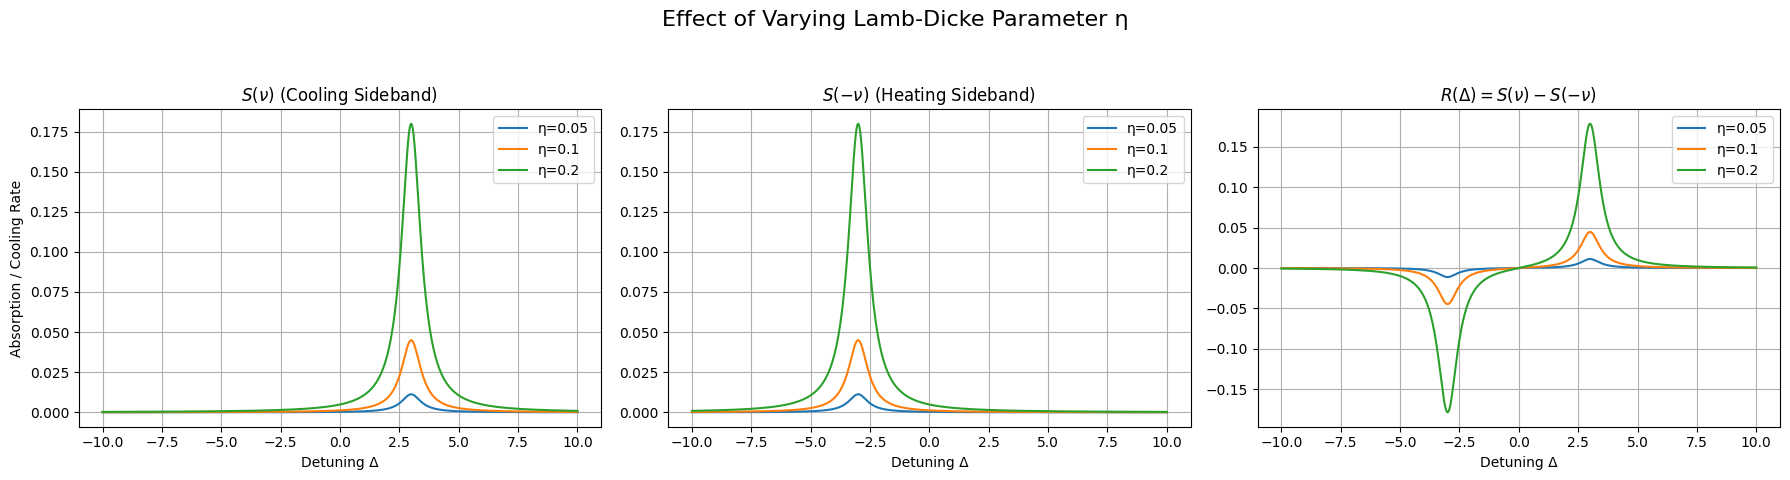

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
Delta_range = np.linspace(-10, 10, 500)
nu = 3.0
gamma = 0.5
eta_values = [0.05, 0.1, 0.2]

# Correct expressions that include η² prefactor
def S_pos(Delta, eta, nu, gamma):
    prefactor = (eta**2 * nu**2 * gamma) / 4
    return prefactor / (gamma**2 + (Delta - nu)**2)

def S_neg(Delta, eta, nu, gamma):
    prefactor = (eta**2 * nu**2 * gamma) / 4
    return prefactor / (gamma**2 + (Delta + nu)**2)

def R_net(Delta, eta, nu, gamma):
    return S_pos(Delta, eta, nu, gamma) - S_neg(Delta, eta, nu, gamma)


#detuning axis
Delta_range = np.linspace(-10, 10, 500)

# Base functions with full η² dependence
def S_pos(Delta, eta, nu, gamma):
    return (eta**2 * nu**2 * gamma) / (4 * (gamma**2 + (Delta - nu)**2))

def S_neg(Delta, eta, nu, gamma):
    return (eta**2 * nu**2 * gamma) / (4 * (gamma**2 + (Delta + nu)**2))

def R_net(Delta, eta, nu, gamma):
    return S_pos(Delta, eta, nu, gamma) - S_neg(Delta, eta, nu, gamma)

# === Sweep Over η ===
gamma = 0.5
eta_values = [0.05, 0.1, 0.2]

fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharex=True)
for eta in eta_values:
    S_nu_vals = S_pos(Delta_range, eta, nu, gamma)
    S_minus_nu_vals = S_neg(Delta_range, eta, nu, gamma)
    R_vals = R_net(Delta_range, eta, nu, gamma)

    axs[0].plot(Delta_range, S_nu_vals, label=f'η={eta}')
    axs[1].plot(Delta_range, S_minus_nu_vals, label=f'η={eta}')
    axs[2].plot(Delta_range, R_vals, label=f'η={eta}')

axs[0].set_title(r"$S(\nu)$ (Cooling Sideband)")
axs[1].set_title(r"$S(-\nu)$ (Heating Sideband)")
axs[2].set_title(r"$R(\Delta) = S(\nu) - S(-\nu)$")

for ax in axs:
    ax.set_xlabel("Detuning Δ")
    ax.grid(True)
    ax.legend()
axs[0].set_ylabel("Absorption / Cooling Rate")
plt.suptitle("Effect of Varying Lamb-Dicke Parameter η", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.93])
plt.show()
